In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [3]:
df = pd.read_parquet("../data/processed/dados_tratados.parquet")
df.head()

,RA,Fase,Ano nasc,Gênero,Instituição de ensino,Pedra,INDE,Cg,Cf,Ct,...,Destaque IDA,Destaque IPV,Defas,ano_base,target_defas,idade,media_academica,indice_comportamental,engajamento,flag_destaque_ieg
0,RA-1,7,2003,Menina,Escola Pública,Quartzo,5.783,753.0,18.0,10.0,...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,-1,NaN,1,NaN,4.90,5.49450,781.0,0
1,RA-2,7,2005,Menina,Rede Decisão,Ametista,7.055,469.0,8.0,3.0,...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,0,NaN,1,NaN,7.22,7.06950,480.0,0
2,RA-3,7,2005,Menina,Rede Decisão,Ágata,6.591,629.0,13.0,6.0,...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,0,NaN,1,NaN,4.46,7.76400,648.0,1
3,RA-4,7,2005,Menino,Rede Decisão,Quartzo,5.951,731.0,15.0,7.0,...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,0,NaN,1,NaN,5.76,6.34450,753.0,0
4,RA-5,7,2005,Menina,Rede Decisão,Ametista,7.427,344.0,6.0,2.0,...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,0,NaN,1,NaN,5.74,7.89725,352.0,1


In [4]:
# BINÁRIAS SIM / NÃO
map_sim_nao = {"Sim": 1, "Não": 0}

for c in ["Indicado", "Atingiu PV"]:
    if c in df.columns:
        df[f"flag_{c.lower().replace(' ', '_')}"] = df[c].map(map_sim_nao)

# LIMPEZA DE CATEGÓRICAS
df["Gênero"] = df["Gênero"].replace({
        "Menina": "Feminino",
        "Menino": "Masculino"
    })

# DROP REDUNDÂNCIAS
drop_cols = [
        "Defas",
        "Ano nasc",
        "Cg", "Cf", "Ct",
        "Destaque IEG", "Destaque IDA", "Destaque IPV"
    ]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])
df.head()

,RA,Fase,Gênero,Instituição de ensino,Pedra,INDE,Nº Av,IAA,IEG,IPS,...,IAN,ano_base,target_defas,idade,media_academica,indice_comportamental,engajamento,flag_destaque_ieg,flag_indicado,flag_atingiu_pv
0,RA-1,7,Feminino,Escola Pública,Quartzo,5.783,4.0,8.3,4.1,5.6,...,5.0,NaN,1,NaN,4.90,5.49450,781.0,0,1.0,0.0
1,RA-2,7,Feminino,Rede Decisão,Ametista,7.055,4.0,8.8,5.2,6.3,...,10.0,NaN,1,NaN,7.22,7.06950,480.0,0,0.0,0.0
2,RA-3,7,Feminino,Rede Decisão,Ágata,6.591,4.0,0.0,7.9,5.6,...,10.0,NaN,1,NaN,4.46,7.76400,648.0,1,0.0,0.0
3,RA-4,7,Masculino,Rede Decisão,Quartzo,5.951,4.0,8.8,4.5,5.6,...,10.0,NaN,1,NaN,5.76,6.34450,753.0,0,0.0,0.0
4,RA-5,7,Feminino,Rede Decisão,Ametista,7.427,4.0,7.9,8.6,5.6,...,10.0,NaN,1,NaN,5.74,7.89725,352.0,1,0.0,0.0


In [5]:
from scipy.stats import ks_2samp

ks_results = []

for col in df.select_dtypes(include=["int64", "float64"]).columns:
    if col != "target_defas":

        grupo_0 = df[df["target_defas"] == 0][col].dropna()
        grupo_1 = df[df["target_defas"] == 1][col].dropna()

        if len(grupo_0) > 30 and len(grupo_1) > 30:
            ks = ks_2samp(grupo_0, grupo_1).statistic
            ks_results.append([col, ks])

ks_df = pd.DataFrame(ks_results, columns=["feature", "ks"])
ks_df.sort_values("ks", ascending=False)


,feature,ks
9,IAN,0.633803
11,idade,0.572535
13,indice_comportamental,0.430703
8,IPV,0.279327
5,Matem,0.259835
3,IPS,0.251739
4,IDA,0.235242
0,Nº Av,0.225633
14,engajamento,0.218741
12,media_academica,0.215571


In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve
)

from scipy.stats import ks_2samp

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


import shap
import warnings
warnings.filterwarnings("ignore")

In [9]:
features_aprovadas = ks_df[ks_df["ks"] >= 0.15]["feature"].tolist()
target = "target_defas"
features_aprovadas, target


(['Nº Av',
  'IEG',
  'IPS',
  'IDA',
  'Matem',
  'Portug',
  'Inglês',
  'IPV',
  'IAN',
  'idade',
  'media_academica',
  'indice_comportamental',
  'engajamento'],
 'target_defas')

In [10]:
df_modelo_final = df[features_aprovadas + [target]].copy()


In [18]:
df_train = df_modelo_final[df_tratado["ano_base"] < 2024]
df_test  = df_modelo_final[df_tratado["ano_base"] == 2024]

X_train = df_train.drop(columns=[target])
y_train = df_train[target]

X_test = df_test.drop(columns=[target])
y_test = df_test[target]

numeric_features = X_train.columns.tolist()

In [19]:
numeric_features = X_train.columns.tolist()




numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ]
)


modelo_baseline = Pipeline(
    steps=[
        ("prep", preprocess),
        ("model", LogisticRegression(max_iter=1000))
    ]
)

modelo_baseline.fit(X_train, y_train)


,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [20]:
proba_test = modelo_baseline.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test, proba_test)
print("AUC:", auc)

print(classification_report(y_test, modelo_baseline.predict(X_test)))


AUC: 0.7183553597650515
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.98      0.99      0.98      1135

    accuracy                           0.97      1156
   macro avg       0.49      0.49      0.49      1156
weighted avg       0.96      0.97      0.97      1156



In [21]:
fpr, tpr, thresholds = roc_curve(y_test, proba_test)

df_threshold = pd.DataFrame({
    "threshold": thresholds,
    "tpr": tpr,
    "fpr": fpr
})

df_threshold.sort_values("tpr", ascending=False).head()


,threshold,tpr,fpr
52,0.053947,1.000000,1.0
51,0.407920,0.996476,1.0
50,0.452366,0.988546,1.0
49,0.531403,0.987665,1.0
48,0.651156,0.969163,1.0


In [25]:
from catboost import CatBoostClassifier

cat_features = X_train.select_dtypes(include="object").columns.tolist()

model_final = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    loss_function="Logloss",
    eval_metric="AUC",
    verbose=100
)

model_final.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test)
)


0:	test: 0.5830082	best: 0.5830082 (0)	total: 1.02ms	remaining: 508ms
100:	test: 0.6807636	best: 0.7139920 (4)	total: 56.9ms	remaining: 225ms
200:	test: 0.7035033	best: 0.7139920 (4)	total: 112ms	remaining: 167ms
300:	test: 0.6958674	best: 0.7139920 (4)	total: 163ms	remaining: 108ms
400:	test: 0.6955737	best: 0.7139920 (4)	total: 216ms	remaining: 53.4ms
499:	test: 0.6955318	best: 0.7139920 (4)	total: 266ms	remaining: 0us

bestTest = 0.7139920285
bestIteration = 4

Shrink model to first 5 iterations.


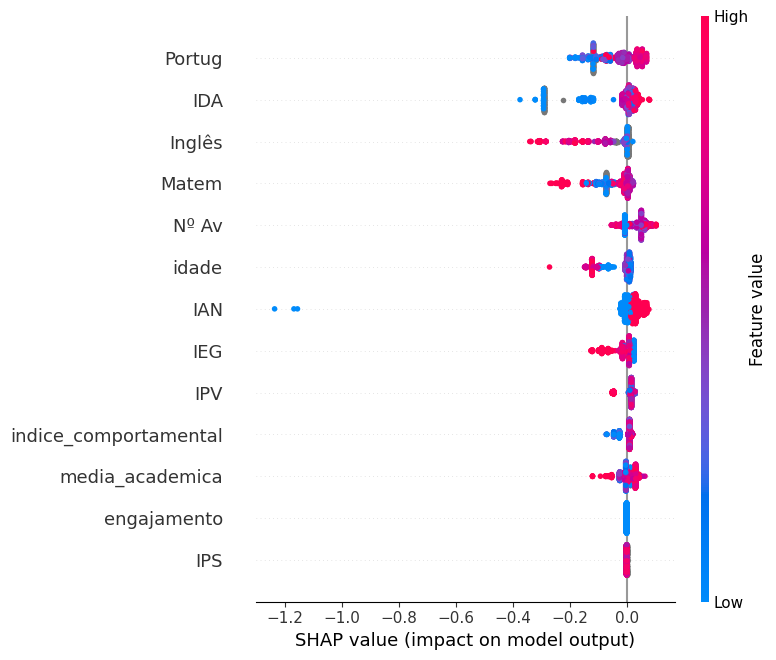

In [23]:
explainer = shap.TreeExplainer(model_final)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


In [24]:
idx = 10  # aluno exemplo

shap.force_plot(
    explainer.expected_value,
    shap_values[idx],
    X_test.iloc[idx]
)
